In [30]:
from astropy.table import Table
import numpy as np
from desitarget.sv1.sv1_targetmask import scnd_mask
import matplotlib.pyplot as plt
import desimodel.io

In [54]:
fba_targets = Table.read('tiles_sv1_scnd/test_focal_plane/fiberassign-081617.fits.gz', hdu='FIBERASSIGN')
fba_targets.sort(keys='LOCATION')
focal_plane,_,_,_ = desimodel.io.load_focalplane()
focal_plane = Table(focal_plane)
focal_plane.sort(keys='LOCATION')
ii = np.in1d(focal_plane['LOCATION'], fba_targets['LOCATION'])
focal_plane = focal_plane[ii]
delta = np.sqrt((focal_plane['OFFSET_X'] - fba_targets['FIBERASSIGN_X'])**2 + (focal_plane['OFFSET_Y'] - fba_targets['FIBERASSIGN_Y'])**2)

In [55]:
fba_targets[:10]

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET
int64,int16,int32,int32,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64
39628435798101631,0,0,0,400,0,5.02552281114979,27.876611773194455,0.0,0.0,2021.0308,5400.0,4620974692658851844,1,TGT,-5.4759855,-29.985594,3400,0.7697304964300665,63,9010,485595,3711,PSF,1.7832738,2.6756427,3.3127606,931.76184,257.10883,43.542553,0,,0.0,0.0,0.0,0.0,0049p280,0.03062275,7.552511,11.108759,3.3752794,0.73482466,1.3869312,2.0809662,2.5764809,1.3869312,2.0809662,2.5764809,0,0.0,0.0,0.0,0.0,S,3400,1,4620974692658851844,0,0,34359738368,0,0,0
616089182749590597,0,1,1,449,0,5.014805262547164,27.85692516626367,0.0,0.0,0.0,5400.0,4294967296,4,SKY,-3.1734903,-34.77239,-1,0.9824344183405056,63,9010,484319,1093,,0.0,0.0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,0049p277,0.0,0.0,0.0,0.0,0.0,0.0043185973,0.060704328,0.008874968,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,,-1,-1,0,0,0,0,4294967296,0,0
39628430446169137,0,2,2,420,0,4.983974142474387,27.85765313938385,0.0,0.0,2021.0308,5400.0,54047318697103110,1,TGT,3.4511106,-34.593864,3400,0.8332718552336047,3,9010,484319,3121,PSF,2.9598773,2.7466285,4.362749,823.9189,276.40814,26.90063,0,,0.0,0.0,0.0,0.0,0049p277,0.030257696,3.7466142,4.4588866,3.4261732,0.7467593,2.3011777,2.135386,3.3918505,2.3011777,2.135386,3.3918505,0,0.0,0.0,0.0,0.0,S,3400,1,54047318697103110,0,0,0,0,0,0
39628430446170286,0,3,3,401,0,5.044689359079332,27.82275358567337,0.0,0.0,2021.0308,5400.0,9292797400071942,1,TGT,-9.597824,-43.08586,3400,0.09058495207800421,3,9010,484319,4270,PSF,1.772045,2.7646189,4.6555347,1069.0192,276.9513,41.400764,0,,0.0,0.0,0.0,0.0,0049p277,0.03194864,11.2339735,19.993614,3.4110289,0.7221223,1.3777143,2.149412,3.6195452,1.3777198,2.1494236,3.6195652,0,0.0,0.0,0.0,0.0,S,3400,1,9292797400071942,0,0,0,0,0,0
39628430446169305,0,4,4,403,0,4.993852893522243,27.807721264030608,0.0,0.0,2021.0308,5400.0,36029621652718342,1,TGT,1.3321518,-46.742363,3400,0.5606906579853875,3,9010,484319,3289,PSF,0.48798835,0.56163496,0.47022983,1713.7104,452.0397,50.439568,0,,0.0,0.0,0.0,0.0,0049p277,0.032008138,0.47987902,0.39982712,3.7887464,0.79604137,0.38002813,0.4373815,0.36619842,0.38142332,0.44094723,0.3747778,0,0.0,0.0,0.0,0.0,S,3400,1,36029621652718342,0,0,0,0,0,0
39628430446170370,0,5,5,427,0,5.050005713483095,27.768307202033682,0.0,0.0,2021.0308,5400.0,72060342817065478,1,TGT,-10.747233,-56.341755,3400,0.9225034790187957,3,9010,484319,4354,PSF,0.32873917,0.37943873,0.54184383,1759.8236,456.64056,56.95636,0,,0.0,0.0,0.0,0.0,0049p277,0.033682466,0.026419917,1.5463394,3.762898,0.8008011,0.25593588,0.2954074,0.42184594,0.2559359,0.29540756,0.42184642,0,0.0,0.0,0.0,0.0,S,3400,1,72060342817065478,0,0,0,0,0,0
39628430446170088,0,6,6,412,0,5.034879579480363,27.763105138686807,-3.020935,-6.9732885,2021.0308,5400.0,2305843017803628544,3,TGT,-7.4928007,-57.608532,1100,0.1572881356187713,7,9010,484319,4072,PSF,35.41398,48.38051,52.821327,277.2144,143.69617,46.073242,2856683560042034688,G2,18.360283,18.6580

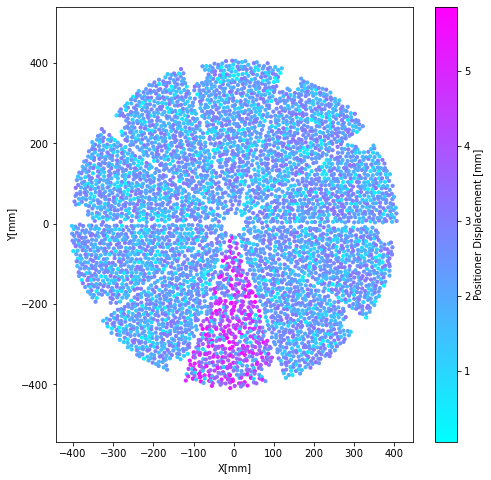

In [79]:
plt.figure(figsize=(8,8))
plt.scatter(fba_targets['FIBERASSIGN_X'], fba_targets['FIBERASSIGN_Y'], s=10, c=delta, cmap='cool')
plt.axis('EQUAL')
plt.xlabel('X[mm]')
plt.ylabel('Y[mm]')
plt.colorbar(label='Positioner Displacement [mm]')
plt.savefig('focalplane.png')

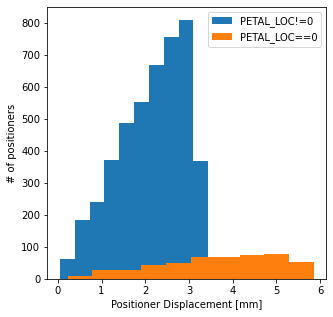

In [77]:
plt.figure(figsize=(5,5))
plt.hist(delta[fba_targets['PETAL_LOC']!=0], label='PETAL_LOC!=0')
plt.hist(delta[fba_targets['PETAL_LOC']==0], label='PETAL_LOC==0')
plt.legend()
plt.xlabel('Positioner Displacement [mm]')
plt.ylabel('# of positioners')
plt.savefig('histogram.png')

In [17]:
fba_targets

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET
int64,int16,int32,int32,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64
39628395453093191,0,311,311,0,0,192.48550240854212,25.970843719996132,0.0,0.0,2021.0199,5400.0,2748779072002,1,TGT,83.41927,-287.9276,3000,0.993331212789783,3,9010,475976,5447,PSF,0.34818423,0.277666,0.39979964,927.60205,258.96277,71.9778,0,,0.0,0.0,0.0,0.0,1923p260,0.010555865,0.6903526,3.5577774,4.201728,0.91371423,0.2708511,0.21599527,0.31100252,0.2708511,0.21599527,0.31100252,0,0.0,0.0,0.0,0.0,S,3000,1,2748779072002,0,0,0,0,0,0
39628395457284156,0,272,272,1,0,192.60044745863544,26.028499068994485,0.0,0.0,2021.0199,5400.0,9007199254749188,1,TGT,57.495277,-272.765,3400,0.017203297687125807,1,9010,475977,2108,REX,0.40657103,0.81983066,1.3123999,1349.6868,382.62836,82.03102,0,,0.0,0.0,0.0,0.0,1926p260,0.01034481,4.817155,8.58406,3.8354483,0.8298551,0.29126194,0.58731544,0.9401853,0.29126194,0.58731544,0.9401853,0,1.0,0.19889253,0.0,0.0,S,3400,1,9007199254749188,0,0,0,0,0,0
39628395457286234,0,252,252,2,0,192.71725155509193,26.04154203650969,0.0,0.0,2021.0199,5400.0,4123168608002,1,TGT,31.416769,-269.2583,3000,0.8981450985333904,3,9010,475977,4186,DEV,0.57001543,0.8467561,1.8834633,866.8614,248.77704,56.351475,0,,0.0,0.0,0.0,0.0,1926p260,0.010993916,4.2849126,3.117963,3.745144,0.8125172,0.31509167,0.46806765,1.041136,0.31509167,0.46806765,1.041136,0,4.0,0.4664071,0.012508905,0.34672913,S,3000,1,4123168608002,0,0,0,0,0,0
155933455941633,0,156,156,3,0,192.86104425885696,26.229706171095604,-0.88224137,0.5334238,2021.0199,5400.0,4611686018427387904,1,TGT,-0.57339215,-221.18161,3400,0.8095129202224491,1,0,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,,3400,100,4611686018427387904,0,0,34359738368,0,0,0
616089147764900904,0,198,198,4,0,192.939965982685,26.099157751651177,0.0,0.0,0.0,5400.0,4294967296,4,SKY,-18.121058,-254.39859,-1,0.9704731725976774,63,9010,475978,1064,,0.0,0.0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,1929p260,0.0,0.0,0.0,0.0,0.0,0.0036378086,0.01997013,0.011580714,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,,-1,-1,0,0,0,0,4294967296,0,0
39628400888908669,0,204,204,5,0,192.6671403418155,26.1434777456911,0.0,0.0,2021.0199,5400.0,549755814402,1,TGT,42.41152,-243.18152,3000,0.781396260118931,3,9010,477272,2941,PSF,0.30754876,0.32829672,0.32175797,931.49725,255.96106,71.579414,0,,0.0,0.0,0.0,0.0,1926p262,0.011185726,0.11335468,-1.5551276,4.273748,0.89138484,0.23955117,0.25571185,0.25061882,0.23955117,0.25571185,0.25061882,0,0.0,0.0,0.0,0.0,S,3000,1,549755814402,0,0,0,0,0,0
39628395461476693,0,233,233,6,0,192.79639940753654,26.057875432155406,0.0,0.0,2021.0199,5400.0,4123168608002,1,TGT,13.78096,-265.0012,3000,0.739380013251192,3,9010,475978,341,REX,0.6206714,0.9574162,1.8763961,564.81165,156.56381,28.203953,0,,0.0,0.0,0.0,0.0,1929p260,0.010990493,3.1373003,3.3550293,3.731476,0.81996226,0.3077929,0.4747857,0.9305107,0.3077929,0.4747857,0.9305107,0,1.0,0.5257